# Graphs

Graphs are a more general structure than trees, so a tree is a special type of graph. Graphs can be used to represent a lot of things like roads, airline flights, internet connectivity, and others. Once you can understand a problem, you can use a graph algorithm to solve what would be very difficult otherwise.

### Vocab

___Vertex___ - Also called a node, is the building block of the graph. It can have a nametag, called the "key" and hold additional info, called the "payload"

___Edge___ - the things that connect the different vertices to show the relationships. They can be one-way or two-way. If all the edges in a graph are one way, then the graph is called a "directed graph", aka "digraph". 

___Weight___ - Edges may be weighted to show the cost of going from one node to another. In a graph of roads that connect two cities, the weight of the edge may represent the distance or toll price between the cities. 

___Graph___ - a graph can be represented by the variable "G" when G = (V,E). "V" is a set of vertices, and e is a set of edges. Each edge is a tuple (v,w), where that tuple is an element in a larger set of edges, or E. Basically, these tuples are all contained in the set E, and all the vertices in set V You can add the third component to the edge tuple as weight. A sample tuple would be this:



    3
v1    --->   v2


here, v1 would be the first vertex and v2 the second, and 3 would be the weight. The tuple would be (v1,v2,3). E would be {(v1,v2,3)} and V would be {v1, v2}

___Path___ - A path in a graph is a sequence of vertices connected by edges. For example, in this graph:
    
    2     1     3
  
v1 ---> v2 ---> v3 ---> v4

The path would be the sequence of vertices (v1,v2,v3,v4) with edges {(v1,v2,2),(v2,v3,1),(v3,v4,3)}

___Cycle___ - A cycle in a directed graph (only one way edges) is a path that starts and ends at the same vertex. A graph with no cycles is an acyclic graph. A directed graph with no cycles is a directed acyclic graph or a DAG. It is easier to solve many important problems if it can be represeneted as a DAG. 

# Adjacency Matrix

Adjacency matrixes are one of the simplest ways to implement a graph. It is basically a 2d matrix. In our implementation, each of the rows / columns represent a vertex. The value stored in the cell at the intersection of row v and column w indicates if there is an edge from vertex v to vertex w, and the value itself is the weight of the edge. Whent to vertices are connected by an edge, they are __adjacent__. Here is an example

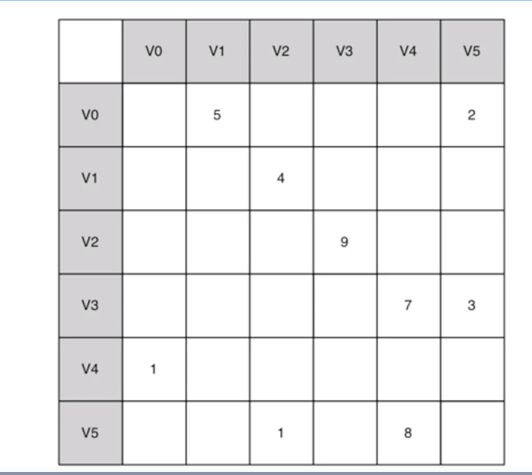

The good thing about the adjacency matrix is that it is simple to read and it is easy to use on small graphs, as well as graphs with many edgest. However, most of the cells in the matrix are empty, so it is a waste of data. When the matrix is empty like this, it is called "sparse". Matrixes are not good for sparse data.

# Adjacency List

Adjacency lists are more space efficient ways to implement sparse graphs. It works by keeping a master list of all the vertices and each vertex keeps a list of all other vertices it is connected to. Here is a visualization:

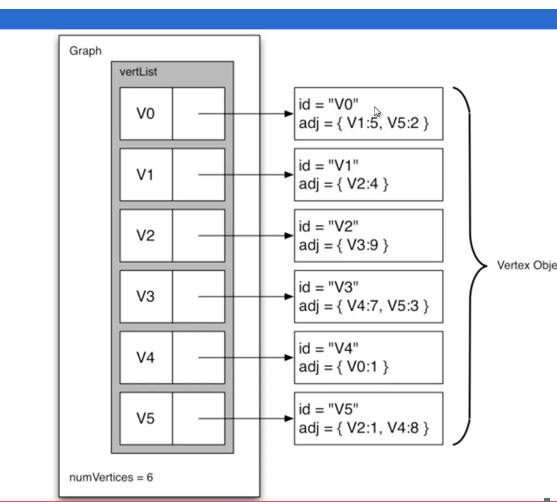

Here, the id is the name of the vertex and the adj dictionary is a dictionary of the vertecies it is connected to and the weight of the edge connecting them. THese are better with sparse graphs with few vertices

### Implementation

In [29]:
class Vertex:
    
    def __init__(self,key):
        self.id = key
        self.connectedTo = {}
        
    def addNeighbor(self,nbr,weight = 0):
        self.connectedTo[nbr] = weight
        
    def getConnections(self):
        return self.connectedTo.keys()
    
    def getId(self):
        return self.id
    
    def getWeight(self,nbr):
        return self.connectedTo[nbr]
    
    def __str__(self):
        return str(self.id) + ' connected to: ' + str([x.id for x in self.connectedTo])

In [30]:
class Graph():
    
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0
    
    def addVertex(self,key):
        self.numVertices += 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex
    
    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None
        
    def addEdge(self, f, t, cost = 0):
        if f not in self.vertList:
            nv = self.addVertex(f)
            
        if t not in self.vertList:
            nv = self.addVertex(t)
            
        self.vertList[f].addNeighbor(self.vertList[t],cost)
        
    def getVertices(self):
        return self.vertList.keys()
    
    def __iter__(self):
        return iter(self.vertList.values())
    
    def __contains__(self,n):
        return n in self.vertList

In [31]:
myGraph = Graph()

In [32]:
myGraph.addVertex('v1')

In [33]:
myGraph.vertList['v1']

In [34]:
myGraph.addVertex('v2')

In [35]:
myGraph.vertList['v2']

In [36]:
myGraph.vertList

{'v1': <__main__.Vertex at 0x25879807f88>,
 'v2': <__main__.Vertex at 0x258798019c8>}

In [37]:
myGraph.addEdge('v1','v2')

In [38]:
for i in myGraph:
    print(i)
    print(i.getConnections())

v1 connected to: ['v2']
dict_keys([<__main__.Vertex object at 0x00000258798019C8>])
v2 connected to: []
dict_keys([])


In [41]:
print('v2' in myGraph)

True


In [42]:
print('v3' in myGraph)

False


# Word Ladder Problem

The word ladder problem is a puzzle where you have to transform one letter at a time to make one word into another word, but each transformation must still be a word. For example,  you might have to transform the word "FOOL" into the word "SAGE". You could do this by first transforming it into POOL, then POLL, then POLE, then PALE, then SALE, then finally SAGE. We need to be able to turn a big collection of words into a graph, with an edge from one word to another if they are different only by one letter. This way, the path from one word to another is the solution. Here is how the graph would look like in this scenario:

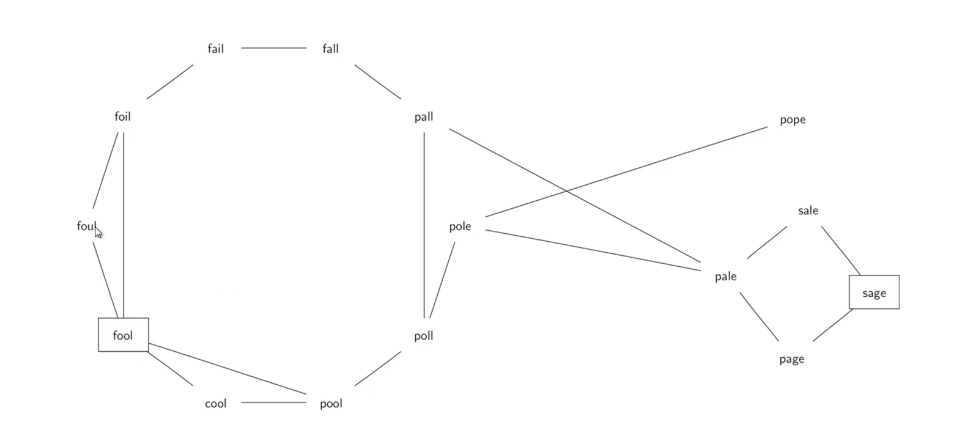

Note that none of the edges are weighted and that it is not a directed graph (digraph). However, with the solution above, it would only work for a small set of words because it is not scalable, as it would be running in O(n^2) time. However, we can do this another way. Suppose that we have a bunch of buckets, each with a 4 letter word on the outside except that one letter was replaced with an underscore. We can then compare the word in the bucket to each other word with the underscore as a wildcard. Every time a word fits, it goes in the bucket. Here is an example:

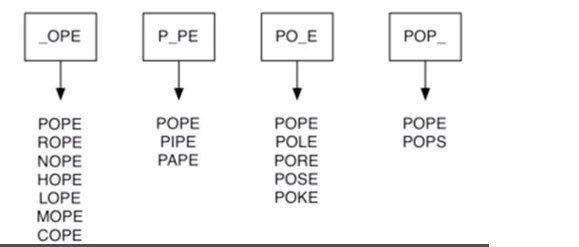

Once you have the dictionary built in we can build out the graph. You start by making a vertex for every word in the graph, then edges between all the vertices we find for words found under the same key in the dictionary (that would link the word POPE, PIPE, and PAPE together, for example)

### Implementation

In [1]:
class Vertex:
    
    def __init__(self,key):
        self.id = key
        self.connectedTo = {}
        
    def addNeighbor(self,nbr,weight = 0):
        self.connectedTo[nbr] = weight
        
    def getConnections(self):
        return self.connectedTo.keys()
    
    def getId(self):
        return self.id
    
    def getWeight(self,nbr):
        return self.connectedTo[nbr]
    
    def __str__(self):
        return str(self.id) + ' connected to: ' + str([x.id for x in self.connectedTo])
    

In [2]:
class Graph():
    
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0
    
    def addVertex(self,key):
        self.numVertices += 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex
    
    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None
        
    def addEdge(self, f, t, cost = 0):
        if f not in self.vertList:
            nv = self.addVertex(f)
            
        if t not in self.vertList:
            nv = self.addVertex(t)
            
        self.vertList[f].addNeighbor(self.vertList[t],cost)
        
    def getVertices(self):
        return self.vertList.keys()
    
    def __iter__(self):
        return iter(self.vertList.values())
    
    def __contains__(self,n):
        return n in self.vertList

In [3]:
def wordLadder(wordFile):
    #wordfile: a text file of words that can be used in the word ladder
    d = {}
    g = Graph()
    
    wfile = open(wordFile,'r')
    #here, we create the buckets of words
    for line in wfile:
        print(line)
        word = line[:-1]
        print(word)
        
        for i in range(len(word)):
            bucket = word[:i] + '_' + word[i+1:]
            
            if bucket in d:
                d[bucket].append(word)
            else:
                d[bucket] = [word]
    #add the vertices and edges for words in buckets
    for bucket in d.keys():
        for word1 in d[bucket]:
            for word2 in d[bucket]:
                if word1 != word2:
                    g.addEdge(word1,word2)
    return g

# Breadth First Search

In the word ladder problem, we have now been able to make our list efficiently with buckets. Now we need a way to actually traverse the graph for the solution. We will be using __breadth first search__ to traverse the graph, and it is one of the easiest algorithms for graph searching. It is also a prototype for other graph algorithms that we will later study. 

__How it works__: Given a graph __G__ and starting vertex __s__, the search starts by exploring all the edges in the graph to find all the vertices in __G__ where there is a path from __s__. The cool thing about breadth first search is that it finds all the variables that are a distance __k__ from __s__ before any vertices that are distance __k+1__.

 A way to visualize it is by imagining that the algorithm is building a tree one level at a time. The search first adds all the children of the starting vertex before any grandchildren, or any of the children's children. 

To keep track of progress, BFS colors all the vertices either white, gray, or black. All vertices start as white, and white represents an undiscovered vertex. When a vertex is discovered it is colored gray, and when it is fully explored that vertex it is colored black. When a vertex is colored black, it has no white vertices adjacent to it. A gray node may have some colored white vertices adjacent, showing that there are still more to explore.

BFS starts at the starting vertex __s__ and colors start gray to show that it is being currently explored. Two ther values, the distance and the predecessor, are set to 0 and None in the beginning. THen, start is placed on a queue. THe next step is to explore vertices at the front of the queue. You explore each new node by iterating through its adjacency list. As each node is examined, it's color is checked. If it is white, then the vertex is unexplored, and 4 things happen:

1. the new, unexplored vertex __nbr__ is colored gray. 
2. The predecessor of __nbr__ is set to the current node __currentVert__
3. The distance to __nbr__ is set to distance to __currentVert + 1__
4. __nbr__ is added to the end of a queue. Adding __nbr__ to the end of the queue. Adding __nbr__ to the end of the queue schedules this node for further exploration, but not until all the other vertices on the adjacency list of __currentVert__ have been explored

Some example code may look like this: 

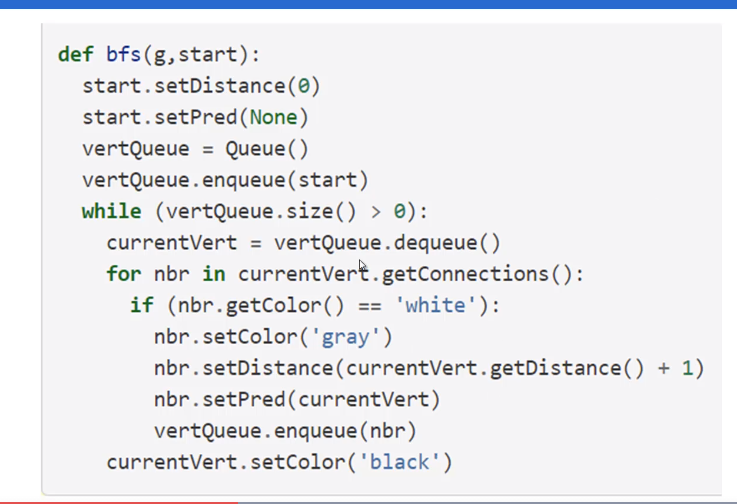

Now, lets look back at our graph:

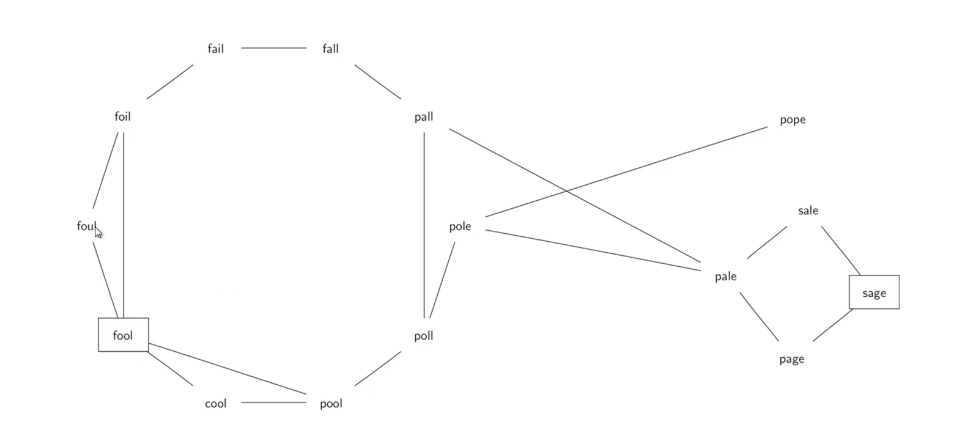

First thing we would do is take all the nodes adjacent to FOOL and add them to the tree. THen, the adjacent nodes would be colored gray and put in the queue, and FOOL would be colored black. Here is how it would look: 


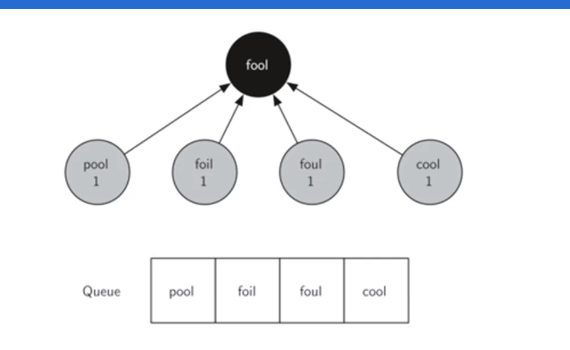

In the next step, BFS removes the first gray node, or POOL, from the queue and adds its adjacent edges to the queue and the tree, as seen here:

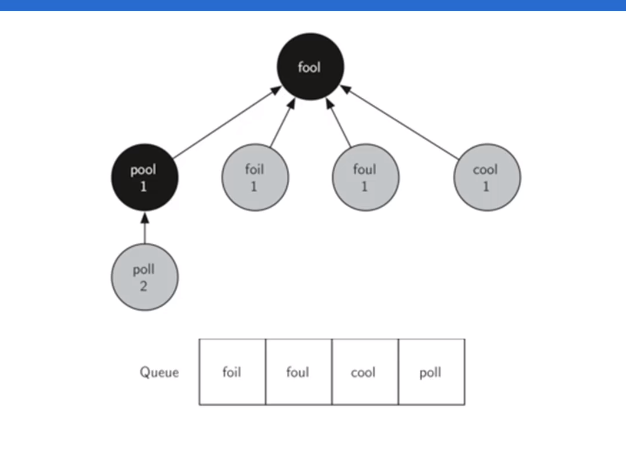

___NOTE: the numbers next to the nodes represent the distance___

You may be wondering why, if POOL is connected to COOL, it isn't shown underneath. This is because BFS sees that COOL is already gray and that there is a shorter path to COOL, and that COOL is already on the queue. The only new node added is POLL, then. Here is the next steps:

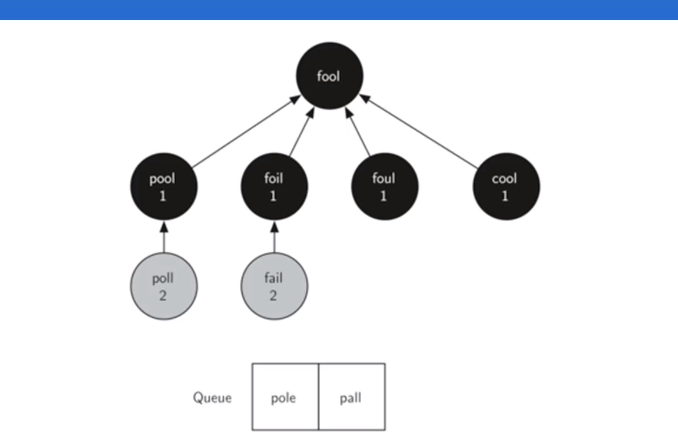

As you can see, neither of the next two nodes adds anything to the tree because their neighbors are already in the tree. However, POLE and PALL are added to the queue as they are connected to POLL.

In the end, it will look like this:

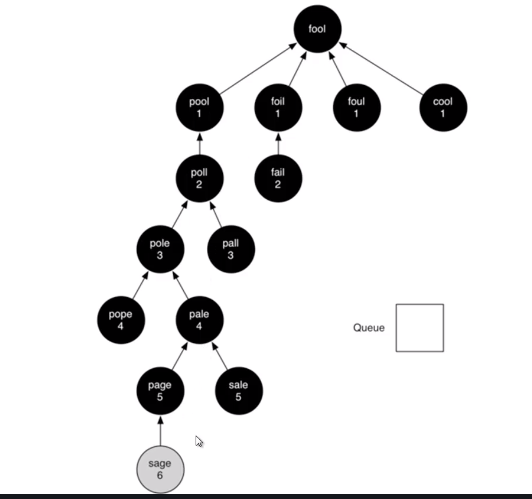

Here, the search stops because SAGE was found. The cool thing about BFS search is that we have not only solved the FOOL to SAGE problem we had, but now many other problems, as we can start at any vertex in BFS and follow the arrowws back to the root to get the shortest word ladder from any word back to FOOL. 

# Knight's tour problem

The knight's tour puzzle is played on a chessboard with only one piece, the knight. The goal of the puzzle is to find a sequence (or path *nudge nudge wink wink*) of moves that let the knight to visit every square of the board exactly once. We will solve this problem with two steps: 

1. We will represent the legal moves of a knight on a chessboard as a graph with edges connecting the different positions a knight could move to and from. 


2. We will use a graph algorithm to find a path of length rows * columns - 1 where each vertex of the graph is visited exactly once

Depth first search is the search we will be using to solve this problem. When the breadth first search algorithm makes a search tree one level at a time, the depth first search creates a search tree by going through one branch of the tree as deeply as possible. We will be looking at 2 algorithms that implement DFS. THe first solves the problem by forbidding a node from being visited more than once, so if we only wanted the knight to visit a square once and no more, and another allows nodes to be visited more than once as the tree is being made, which is the general DFS we will be talking about. 

The depth first exploration of the graph is what we need to find a path that has exactly 63 edges (so that it reaches every space exactly once). When the search algorithm finds a dead end, or a place in a graph where there are no more new moves, it will back the tree up to the next deepest vertex that lets it make a legal move.

The knight's tour function will take 4 parameters:

1. n - the current depth in the search tree
2. path - a list of vertices that we have already visited
3. u - the vertex in the graph we want to explore
4. limit - the number of nodes in the path

If you can't already tell, the Knight's tour function is recursive. Here is how the function would look like:

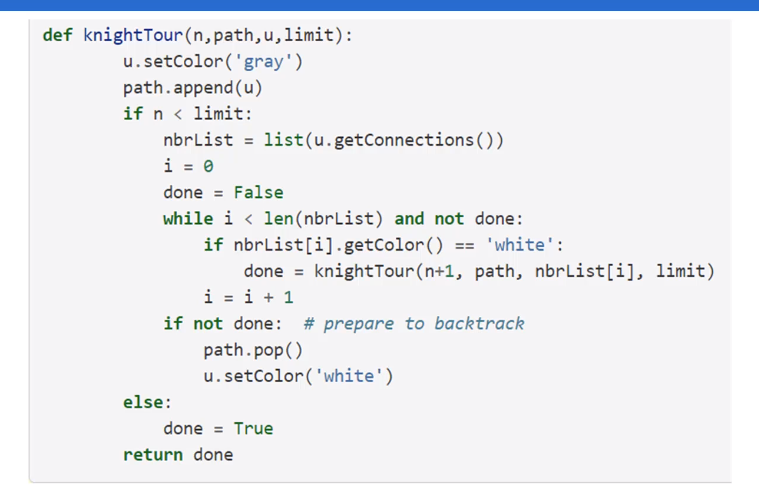



Step by step:

1. the current vertex is set to 'gray' to show that it is being explored
2. the vertex is added to 'path' to show that it will be explored by the end.
3. if we haven't reached a dead end yet, then set the variable 'nbrList' to the list of neighbors of the vertex we are exploring
4. iterate through the branch of the graph until a dead end is reached, aka when 'done' remains false, and then backtrack to the node that is the parent of the node we were exploring. We will then color the node we were exploring white to show that we cannot go there without a dead end and will get there through some other way.
5. eventaully, you will have explored every vertex in the graph.

# General DFS

The general DFS search is a different type of DFS whose goal it is to search as deeply as possible while connecting as many nodes in the graph as it an and branching out when necessary. It is possible that a depth first search may even create more than one tree. When it creates a group of trees it is called a ___depth first forest___. Just like the Breadth First search, General DFS will use predecessor links to construct the tree. The depth first search will also use two additional instance variables in the Vertex class, which are __discovery__ and __finish__ times. The discovery time tracks the number of steps in the algorithm before a vertex is found, and the finish time is the number of steps in the algorithm before a vertex is colored black, or fully explored.

The start and finish times for all nodes in the DFS tree display a property called __parenthesis property__. This property means that all children of a particular node in the depth first tree havea a later and an earlier finish time than their parent. 

# Implementation of Graph

We will be creating and implementing a directed graph where the edges can hold weights. We have 3 classes: a State class (which colors a node white, black, or gray), a Node class (which keeps a dictionary of its connections, their weights, and its own value), and the graph class which organizes both the Vertices and the Edges. For the State class, we will take advantage of two built-in tools, OrderedDict and Enum. OrderedDict is a dictionary that remembers the order that keys were inserted. Enum is used to create an enumeration that lets you call specific parts of a class and assign stuff. 

In [3]:
from enum import Enum

class State(Enum):
    unvisited = 1 #This is color white
    visiting = 2 #This is color gray
    visited = 3 #This is color black

In [4]:
class Node:
    
    def __init__(self,iD):
        self.ID = iD
        self.visit_state = State.unvisited
        self.adj = {} #key = node, value = value of connected node
        
    def __str__(self):
        return str(self.ID)

In [5]:
class Graph:
    
    def __init__(self):
        self.Vertices = {}
        
    def add_node(self,num):
        newNode = Node(num)
        self.Vertices[num] = newNode
        return newNode
    
    def add_edge(self,source,destination,weight = 0):
        if source not in self.Vertices:
            self.add_node(source)
            
        if destination not in self.Vertices:
            self.add_node(destination)
            
        self.Vertices[source].adj[self.Vertices[destination]] = destination

In [6]:
#now to test if it worked
g = Graph()

In [7]:
g.add_edge(1,2)
g.Vertices

{1: <__main__.Node at 0x14d1aa8d688>, 2: <__main__.Node at 0x14d1aa8d648>}

In [8]:
g.add_edge(1,3)

In [9]:
g.add_edge(2,4)

In [10]:
g.Vertices

{1: <__main__.Node at 0x14d1aa8d688>,
 2: <__main__.Node at 0x14d1aa8d648>,
 3: <__main__.Node at 0x14d1aa87148>,
 4: <__main__.Node at 0x14d1aa914c8>}

In [11]:
for i in g.Vertices:
    print(g.Vertices[i].visit_state)

State.unvisited
State.unvisited
State.unvisited
State.unvisited


# DFS implementation

In [178]:
def DFS(node):
    for i in node.adj:
        print('in')
        if i.visit_state == State.unvisited:
            print('visiting',i)
            i.visit_state = State.visiting
            DFS(i)
        i.visit_state = State.visited
    print('im bacc from visiting',node)
    node.visit_state = State.visited

In [179]:
DFS(g.Vertices[1])

in
visiting 2
in
visiting 4
im bacc from visiting 4
im bacc from visiting 2
in
visiting 3
im bacc from visiting 3
im bacc from visiting 1


# BFS Implementation

In [ ]:
def BFS(node):
    queue = [node]
    parents = {node.ID: None}
    seen = []
    while queue:
        curr = queue.pop()
        for i in curr.adj:
            print('adding',i)
            queue.append(i)
            parents[i.ID] = curr.ID
        seen.append(curr.ID)
    return seen, parents

In [ ]:
BFS(g.Vertices[1])